# Interactive Example

In [1]:
import requests
import json
import pandas as pd
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
# GAMMA_API_URL = "http://127.0.0.1:8000"
GAMMA_API_URL = "https://ai4eps-gamma.hf.space"


## 2. Prepare test data

- Download test data: PhaseNet picks of the 2019 Ridgecrest earthquake sequence
1. picks file: picks.json
2. station information: stations.csv
3. events in SCSN catalog: events.csv
4. config file: config.pkl

```bash
wget https://github.com/wayneweiqiang/GMMA/releases/download/test_data/test_data.zip
unzip test_data.zip
```

In [3]:
# !wget https://github.com/wayneweiqiang/GMMA/releases/download/test_data/test_data.zip
# !unzip test_data.zip

In [4]:
data_dir = lambda x: os.path.join("test_data", x)
station_csv = data_dir("stations.csv")
pick_json = data_dir("picks.json")
catalog_csv = data_dir("catalog_gamma.csv")
picks_csv = data_dir("picks_gamma.csv")
if not os.path.exists("figures"):
    os.makedirs("figures")
figure_dir = lambda x: os.path.join("figures", x)

## set config
config = {'xlim_degree': [-118.004, -117.004], 
          'ylim_degree': [35.205, 36.205],
          'z(km)': [0, 41]}

## read stations
stations = pd.read_csv(station_csv, delimiter="\t")
stations = stations.rename(columns={"station":"station_id"})

## read picks
picks = pd.read_json(pick_json).sort_values("timestamp").iloc[:200]
picks["timestamp"] = pd.to_datetime(picks["timestamp"])



In [5]:
picks

,id,timestamp,prob,amp,type
51368,CI.WCS2..HH,2019-07-04 17:00:00.004,0.371902,1.576248e-06,p
50738,CI.WBM..BH,2019-07-04 17:00:00.004,0.429425,4.883445e-07,p
51254,CI.WCS2..BH,2019-07-04 17:00:00.004,0.570932,1.388111e-06,p
51643,CI.WMF..BH,2019-07-04 17:00:00.004,0.325480,1.930339e-07,p
51727,CI.WMF..HH,2019-07-04 17:00:00.004,0.499070,1.795238e-07,p
...,...,...,...,...,...
52664,CI.WRV2..EH,2019-07-04 17:05:13.634,0.565324,6.402773e-07,p
53676,PB.B918..EH,2019-07-04 17:05:13.754,0.621534,6.146262e-07,s
53083,CI.WVP2..HN,2019-07-04 17:05:13.894,0.891210,4.123632e-06,p
46727,CI.CCC..HN,2019-07-04 17:05:14.004,0.791852,5.821601e-06,s


In [6]:
stations

,station_id,longitude,latitude,elevation(m),unit,component,response
0,CI.CCC..BH,-117.365,35.525,670.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
1,CI.CCC..HH,-117.365,35.525,670.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
2,CI.CCC..HN,-117.365,35.525,670.0,m/s**2,"E,N,Z","213979.00,214322.00,213808.00"
3,CI.CLC..BH,-117.598,35.816,775.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
4,CI.CLC..HH,-117.598,35.816,775.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
5,CI.CLC..HN,-117.598,35.816,775.0,m/s**2,"E,N,Z","213945.00,213808.00,213740.00"
6,CI.DTP..BH,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
7,CI.DTP..HH,-117.846,35.267,908.0,m/s,"E,N,Z","627368000.00,627368000.00,627368000.00"
8,CI.DTP..HN,-117.846,35.267,908.0,m/s**2,"E,N,Z","214399.00,213971.00,214484.00"
9,CI.JRC2..BH,-117.809,35.982,1469.0,m/s,"E,N,Z","784866000.00,784866000.00,790478000.00"


In [7]:
picks.rename(columns={"id": "station_id", "timestamp": "phase_time", "prob": "phase_score", "amp": "phase_amplitude", "type": "phase_type"}, inplace=True)
stations.rename(columns={"id": "station_id", "elevation(m)": "elevation_m"}, inplace=True)
stations.drop(columns=["unit", "component", "response"], inplace=True, errors="ignore")

In [8]:
picks["phase_type"] = picks["phase_type"].str.upper()

In [9]:
picks = picks.merge(stations[["station_id", "latitude", "longitude", "elevation_m"]], on="station_id", how="left")

In [10]:
picks

,station_id,phase_time,phase_score,phase_amplitude,phase_type,latitude,longitude,elevation_m
0,CI.WCS2..HH,2019-07-04 17:00:00.004,0.371902,1.576248e-06,P,36.025,-117.765,1143.0
1,CI.WBM..BH,2019-07-04 17:00:00.004,0.429425,4.883445e-07,P,35.608,-117.890,892.0
2,CI.WCS2..BH,2019-07-04 17:00:00.004,0.570932,1.388111e-06,P,36.025,-117.765,1143.0
3,CI.WMF..BH,2019-07-04 17:00:00.004,0.325480,1.930339e-07,P,36.118,-117.855,1537.4
4,CI.WMF..HH,2019-07-04 17:00:00.004,0.499070,1.795238e-07,P,36.118,-117.855,1537.4
...,...,...,...,...,...,...,...,...
195,CI.WRV2..EH,2019-07-04 17:05:13.634,0.565324,6.402773e-07,P,36.008,-117.890,1070.0
196,PB.B918..EH,2019-07-04 17:05:13.754,0.621534,6.146262e-07,S,35.936,-117.602,1042.6
197,CI.WVP2..HN,2019-07-04 17:05:13.894,0.891210,4.123632e-06,P,35.949,-117.818,1465.0
198,CI.CCC..HN,2019-07-04 17:05:14.004,0.791852,5.821601e-06,S,35.525,-117.365,670.0


In [11]:
picks = picks[(picks["phase_time"] > pd.to_datetime("2019-07-04T17:02:00.000")) & (picks["phase_time"] < pd.to_datetime("2019-07-04T17:04:00.000"))]

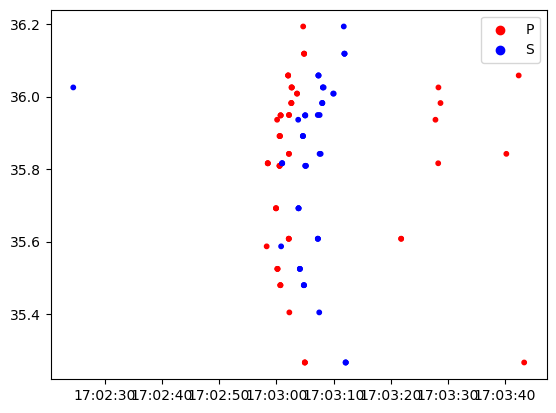

In [12]:
plt.figure()
color = {"P": "red", "S": "blue"}
plt.scatter(picks["phase_time"], picks["latitude"], c=picks["phase_type"].apply(lambda x: color[x]), s=10)
plt.scatter([], [], c="red", label="P")
plt.scatter([], [], c="blue", label="S")
plt.legend()
plt.show()

Associating 108 picks with 1 CPUs
.

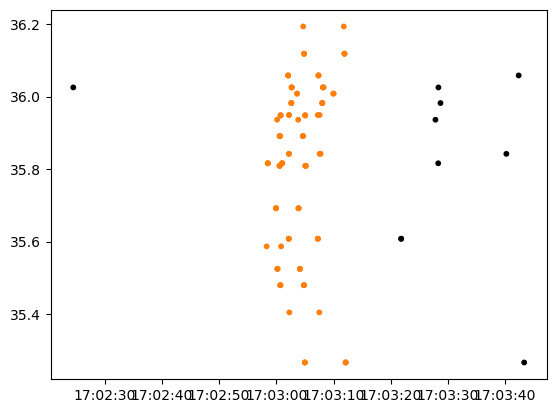

In [13]:
from app import run_gamma

config["region"] = "Ridgecrest"
config["event_index"] = 1

picks_ = picks.copy()
evengts_, picks_ = run_gamma(picks, stations, config)

plt.figure()
mapping_color = lambda x: f"C{x}" if x!= -1 else "black"
plt.scatter(picks_["phase_time"], picks_["latitude"], c=picks_["event_index"].apply(mapping_color), s=10)

In [18]:
picks_  = picks.copy()
picks_["phase_time"] = picks_["phase_time"].apply(lambda x: x.isoformat())
stations_ = stations.copy()

picks_ = picks_.to_dict(orient="records")
stations_ = stations.to_dict(orient="records")

response = requests.post(f"{GAMMA_API_URL}/predict/", json={"picks": {"data":picks_}, "stations": {"data": stations_}, "config": config})

if response.status_code == 200:
    result = response.json()
    # Process the result as needed
else:
    print(f"Request failed with status code: {response.status_code}")
    print(f"Error message: {response.text}")

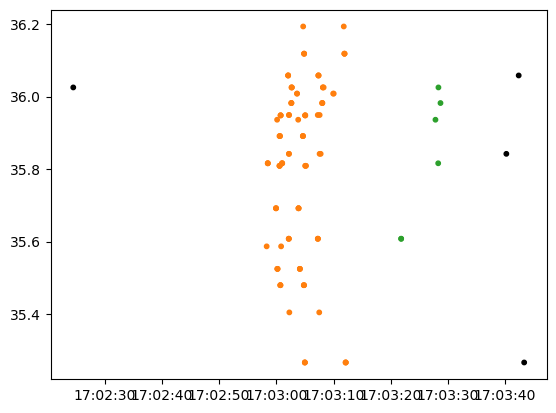

In [19]:
events = pd.DataFrame(result["events"])
picks_ = pd.DataFrame(result["picks"])
picks_["phase_time"] = pd.to_datetime(picks_["phase_time"])

plt.figure()
mapping_color = lambda x: f"C{x}" if x!= -1 else "black"
plt.scatter(picks_["phase_time"], picks_["latitude"], c=picks_["event_index"].apply(mapping_color), s=10)

In [20]:
events

,time,magnitude,sigma_time,sigma_amp,cov_time_amp,gamma_score,num_picks,num_p_picks,num_s_picks,event_index,longitude,latitude,depth_km
0,2019-07-04T17:02:55.008,4.339750,0.326146,0.328015,0.050179,98.0,98,49,49,1,-117.495965,35.710353,16.201632
1,2019-07-04T17:03:20.759,2.352815,0.671548,0.509110,0.054984,6.0,6,6,0,2,-117.964128,35.615117,0.000000


In [21]:
picks_

,station_id,phase_time,phase_score,phase_amplitude,phase_type,latitude,longitude,elevation_m,event_index,gamma_score
0,CI.WCS2..HN,2019-07-04 17:02:24.474,0.345736,0.000003,S,36.025,-117.765,1143.0,-1,-1.000000
1,PB.B921..EH,2019-07-04 17:02:58.304,0.945370,0.000961,P,35.587,-117.462,694.5,1,0.000156
2,CI.CLC..BH,2019-07-04 17:02:58.494,0.976444,0.002152,P,35.816,-117.598,775.0,1,0.230913
3,CI.CLC..HN,2019-07-04 17:02:58.504,0.968991,0.002354,P,35.816,-117.598,775.0,1,0.748433
4,CI.CLC..HH,2019-07-04 17:02:58.504,0.979083,0.002593,P,35.816,-117.598,775.0,1,0.788957
...,...,...,...,...,...,...,...,...,...,...
103,CI.WCS2..HN,2019-07-04 17:03:28.354,0.496533,0.000056,P,36.025,-117.765,1143.0,2,0.824170
104,CI.JRC2..HN,2019-07-04 17:03:28.714,0.383873,0.000084,P,35.982,-117.809,1469.0,2,0.979752
105,CI.WNM..HN,2019-07-04 17:03:40.234,0.313130,0.000019,P,35.842,-117.906,974.3,-1,-1.000000
106,CI.MPM..HN,2019-07-04 17:03:42.394,0.373462,0.000028,P,36.058,-117.489,1839.0,-1,-1.000000
